## Learning Objectives

Students will be able to:

- Explain how a decision tree is created.
- Build a decision tree model in scikit-learn.
- Tune a decision tree model and explain how tuning impacts the model.
- Interpret a tree diagram.
- Describe the key differences between regression and classification trees.
- Decide whether or not a decision tree is an appropriate model for a given problem.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# allow plots to appear in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [30]:
# Quick function to print relevant metrics for classification

def print_metrics(y,preds):
    accuracy = accuracy_score(y, preds)
    precision = precision_score(y, preds)
    recall = recall_score(y, preds)
    roc = roc_auc_score(y, preds)
    f1 = f1_score(y, preds)
    
    print(f'The classification metics:')
    print(f'Accuracy Score:  {accuracy}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score:    {recall}')
    print(f'ROC-AUC Score:   {roc}')
    print(f'F1 Score:        {f1}')
        

In [3]:
# Read in the data.
path = './data/titanic.csv'
titanic = pd.read_csv(path)

# Encode female as 0 and male as 1.
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# Fill in the missing values for age with the median age.
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# Create a DataFrame of dummy variables for Embarked.
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame.
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# Print the updated DataFrame.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [4]:
# Define X and y.
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']

X = titanic[feature_cols]
y = titanic.Survived

## Massively overfit tree with no tuning

In [9]:
tree_n_clf = DecisionTreeClassifier(max_depth=None, random_state=1)
tree_n_clf.fit(X, y)

DecisionTreeClassifier(random_state=1)

![Tree for Titanic data](img/tree_titanic-all.png)

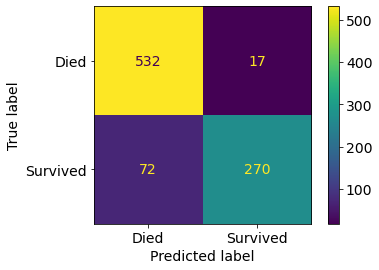

In [34]:
plot_confusion_matrix(tree_n_clf, X,y, display_labels= ['Died','Survived']);

In [35]:
print_metrics(y=y, preds=tree_n_clf.predict(X))

The classification metics:
Accuracy Score:  0.9001122334455668
Precision Score: 0.9407665505226481
Recall Score:    0.7894736842105263
ROC-AUC Score:   0.8792541462946986
F1 Score:        0.8585055643879174


## Lightly tuned tree

In [36]:
tree_3_clf = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_3_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

![Tree for Titanic data](img/tree_titanic-3.png)

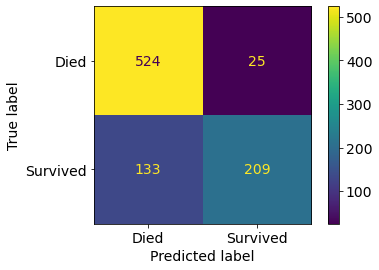

In [37]:
plot_confusion_matrix(tree_3_clf, X,y, display_labels= ['Died','Survived']);

In [38]:
print_metrics(y, tree_3_clf.predict(X))

The classification metics:
Accuracy Score:  0.8226711560044894
Precision Score: 0.8931623931623932
Recall Score:    0.6111111111111112
ROC-AUC Score:   0.7827868852459018
F1 Score:        0.7256944444444445


In [42]:
# Compute the feature importances (the Gini index at each node).

pd.DataFrame({'feature':feature_cols, 'importance':tree_3_clf.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
1,Sex,0.655584
0,Pclass,0.242664
2,Age,0.064494
4,Embarked_S,0.037258
3,Embarked_Q,0.000000
